**39\. Methodenseminar - Big Data Module II: Introduction to Social Network Science with Python**

# A tutorial on stochastic block modelling: graph-tool basics

**Author**: <a href='https://marcosoliveira.info/'>Marcos Oliveira</a>, GESIS - Leibniz Institute for the Social Sciences

**Version**: 29 May 2019

**Description**: This is an introduction to stochastic block modelling in Python using the <code>graph-tool</code> library. 
    
## Imports and Settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<div class="alert alert-danger">
    You need the <code>graph_tool</code> library in your machine. Sometimes the installation is challenging. This <a href=https://git.skewed.de/count0/graph-tool/wikis/installation-instructions>page</a> might help you.
</div>

In [2]:
import graph_tool.all as gt

## Creating a graph

In [3]:
ug = gt.Graph(directed=False)

In [4]:
ug.add_vertex(10)

<generator object Graph.add_vertex.<locals>.<genexpr> at 0x7fdf7e582b88>

In [5]:
for (i, j) in [(0, 7), (7, 3), (4, 9), (7, 1), (5, 8), (2,7), (5, 6), (5, 4), (4, 7)]:
    ug.add_edge(ug.vertex(i), ug.vertex(j))

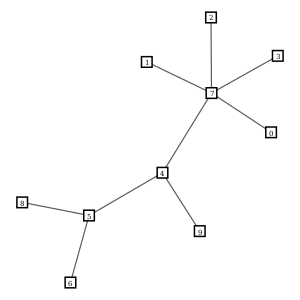

In [6]:
gt.graph_draw(
    ug, 
    vertex_text=ug.vertex_index, vertex_font_size=7, 
    vertex_color="black", vertex_fill_color="white",
    vertex_size=15, vertex_shape="square",
    edge_pen_width=1.2, output_size=(300, 300));

`graph-tool` has some networks: https://graph-tool.skewed.de/static/doc/collection.html.

In [7]:
gt.collection.data.keys()

dict_keys(['adjnoun', 'as-22july06', 'astro-ph', 'celegansneural', 'cond-mat', 'cond-mat-2003', 'cond-mat-2005', 'dolphins', 'email-Enron', 'football', 'hep-th', 'karate', 'lesmis', 'netscience', 'pgp-strong-2009', 'polblogs', 'polbooks', 'power', 'serengeti-foodweb'])

In [8]:
print(gt.collection.descriptions['dolphins'])

Dolphin social network: an undirected social network of frequent associations between 62 dolphins in a community living off Doubtful Sound, New Zealand. Please cite D. Lusseau, K. Schneider, O. J. Boisseau, P. Haase, E. Slooten, and S. M. Dawson, Behavioral Ecology and Sociobiology 54, 396-405 (2003). Retrieved from `Mark Newman's website <http://www-personal.umich.edu/~mejn/netdata/>`_.


In [9]:
g = gt.collection.data["karate"].copy()

In [10]:
g = gt.GraphView(g, vfilt=gt.label_largest_component(g))
g = gt.Graph(g, prune=True)

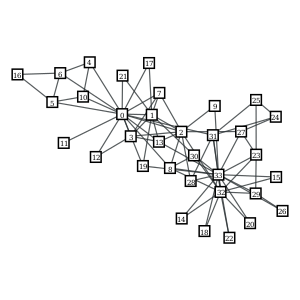

In [11]:
gt.graph_draw(
    g, 
    vertex_text=g.vertex_index, vertex_font_size=7, 
    vertex_color="black", vertex_fill_color="white",
    vertex_size=15, vertex_shape="square",
    edge_pen_width=1.2, output_size=(300, 300));

In [12]:
g.remove_edge(g.edge(22,33))

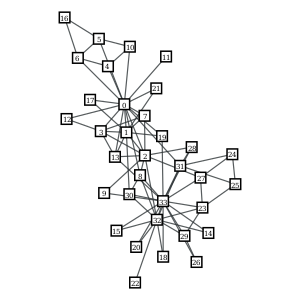

In [13]:
gt.graph_draw(
    g, 
    vertex_text=g.vertex_index, vertex_font_size=7, 
    vertex_color="black", vertex_fill_color="white",
    vertex_size=15, vertex_shape="square",
    edge_pen_width=1.2, output_size=(300, 300));

In [14]:
pos = gt.sfdp_layout(g)

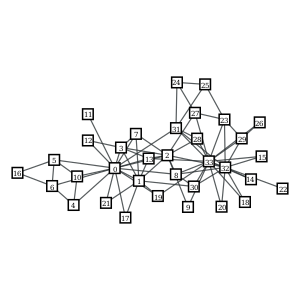

In [15]:
gt.graph_draw(
    g, 
    vertex_text=g.vertex_index, vertex_font_size=7, 
    pos=pos,
    vertex_color="black", vertex_fill_color="white",
    vertex_size=15, vertex_shape="square",
    edge_pen_width=1.2, output_size=(300, 300));

In [16]:
gt.local_clustering(g).fa

PropertyArray([0.15      , 0.33333333, 0.24444444, 0.66666667, 0.66666667,
               0.5       , 0.5       , 1.        , 0.5       , 0.        ,
               0.66666667, 0.        , 1.        , 0.6       , 1.        ,
               1.        , 1.        , 1.        , 1.        , 0.33333333,
               1.        , 1.        , 0.        , 0.4       , 0.33333333,
               0.33333333, 1.        , 0.16666667, 0.33333333, 0.66666667,
               0.5       , 0.2       , 0.18181818, 0.11666667])

In [17]:
gt.global_clustering(g)

(0.2583170254403131, 0.0595826405702056)

### Property maps

In ```graph-tool```, you use property maps to link meta data to vertices, edges, and the graph. 

Let's see the documentation: 

<div class="alert alert-warning">
Property maps are a way of associating additional information to the vertices, edges or to the graph itself. There are thus three types of property maps: vertex, edge and graph. All of them are handled by the same class, <b>PropertyMap</b>. Each created property map has an associated value type, which must be chosen from the predefined set:

  | Type name              |  Alias |
|------------------------|--------------|
|``bool``                | ``uint8_t`` |
|``int16_t``             | ``short`` |
|``int32_t``             | ``int`` |
|``int64_t``             | ``long``, ``long long`` |
|``double``              | ``float`` |
|``long double``         | |
|``string``              | |
|``vector<bool>``        | ``vector<uint8_t>`` |
|``vector<int16_t>``     | ``vector<short>`` |
|``vector<int32_t>``     | ``vector<int>`` |
|``vector<int64_t>``     | ``vector<long>``, ``vector<long long>`` |
|``vector<double>``      | ``vector<float>`` |
|``vector<long double>`` | |
|``vector<string>``      | | 
|``python::object``      | ``object`` |

New property maps can be created for a given graph by calling the new_vertex_property(), new_edge_property(), or new_graph_property(), for each map type.
</div>

Let's check the documentation for the signatures to create vertex properties:

<div class="alert alert-warning">
    
- **new_vertex_property**(value_type, vals=None, val=None) Create a new vertex property map of type <code>value_type</code>, and return it. If provided, the values will be initialized by <code>vals</code>, which should be sequence or by <code>val</code> which should be a single value.
</div>

edges properties:

<div class="alert alert-warning">
    
- **new_edge_property**(value_type, vals=None, val=None) Create a new edge property map of type <code>value_type</code>, and return it. If provided, the values will be initialized by <code>vals</code>, which should be sequence or by <code>val</code> which should be a single value.
</div>

and graph properties: 
<div class="alert alert-warning">
    
- **new_graph_property**(value_type, val=None) Create a new graph property map of type <code>value_type</code>, and return it. If <code>val</code> is not None, the property is initialized to its value.
</div>

In [18]:
color_property = g.new_vertex_property("vector<double>") 
colors = [[0.89, 0.10, 0.10, 255.],
          [0.21, 0.49, 0.72, 255.]]
for v in g.vertices():
    color_property[v] = colors[np.random.randint(2)]

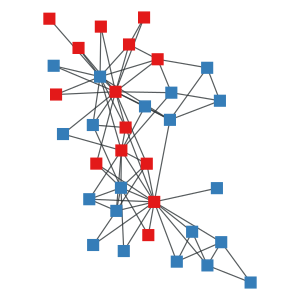

In [19]:
gt.graph_draw(
    g, 
    vertex_color=color_property, vertex_fill_color=color_property,
    vertex_size=15, vertex_shape="square",
    edge_pen_width=1.2, output_size=(300, 300));

If we want a property to be a part of the graph object, we assign it to the graph ```g``` using the following dictionaries: ```g.graph_properties```, ```g.edge_properties```, and ```g.vertex_properties```.

In [20]:
weight = g.new_edge_property("double")           
for e in g.edges():
    weight[e] = np.random.rand()*5
g.edge_properties['weight'] = weight

In [21]:
g.list_properties()

description    (graph)   (type: string, val: Zachary's karate club: social
                                             network of friendships between 34
                                             members of a karate club at a US
                                             university in the 1970s. Please
                                             cite W. W. Zachary, An information
                                             flow model for conflict and fission
                                             in small groups, Journal of
                                             Anthropological Research 33,
                                             452-473 (1977). Retrieved from
                                             `Mark Newman's website <http://www-
                                             personal.umich.edu/~mejn/netdata/>`
                                             _.)
readme         (graph)   (type: string, val: The file karate.gml contains the
                  

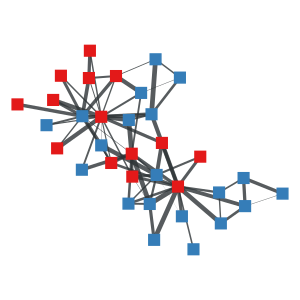

In [22]:
gt.graph_draw(
    g, 
    vertex_color=color_property, vertex_fill_color=color_property,
    vertex_size=15, vertex_shape="square", edge_pen_width=weight,
    output_size=(300, 300));

Useful links: 

- https://graph-tool.skewed.de/static/doc/centrality.html
- https://graph-tool.skewed.de/static/doc/clustering.html
- https://graph-tool.skewed.de/static/doc/stats.html
- https://graph-tool.skewed.de/static/doc/topology.html
- https://graph-tool.skewed.de/static/doc/spectral.html

In [23]:
gt.pagerank(g)

<PropertyMap object with key type 'Vertex' and value type 'double', for Graph 0x7fdf7d31ab38, at 0x7fdf7d31af28>

## Some useful methods

Adjacency matrix:

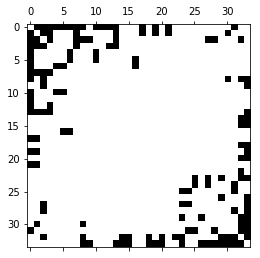

In [24]:
adjacency = gt.adjacency(g)
plt.matshow(adjacency.todense(), cmap=plt.cm.bone_r);

Removing parallel edges:

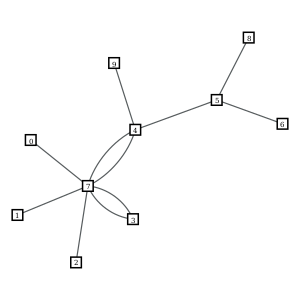

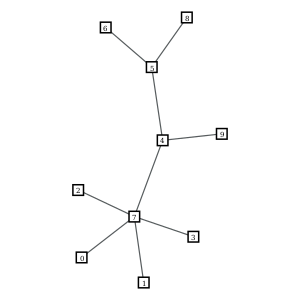

In [25]:
ug = gt.Graph(directed=False)
ug.add_vertex(10)
for (i, j) in [(0, 7), (7, 3), (7, 3), (4, 9), (7, 1), (5, 8), (2,7), (5, 6), (5, 4), (4, 7), (4, 7)]:
    ug.add_edge(ug.vertex(i), ug.vertex(j))
gt.graph_draw(
    ug, 
    vertex_text=ug.vertex_index, vertex_font_size=7, 
    vertex_color="black", vertex_fill_color="white",
    vertex_size=15, vertex_shape="square",
    edge_pen_width=1.2, output_size=(300, 300));

gt.remove_parallel_edges(ug)

gt.graph_draw(
    ug, 
    vertex_text=ug.vertex_index, vertex_font_size=7, 
    vertex_color="black", vertex_fill_color="white",
    vertex_size=15, vertex_shape="square",
    edge_pen_width=1.2, output_size=(300, 300));

Getting only the largest component

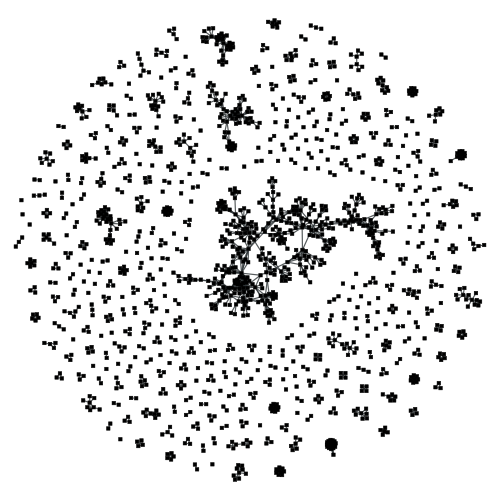

In [26]:
g = gt.collection.data["netscience"]
gt.graph_draw(
    g, 
    vertex_color="black", vertex_fill_color="black",
    vertex_size=5, vertex_shape="square",
    edge_pen_width=1.2, output_size=(500, 500));

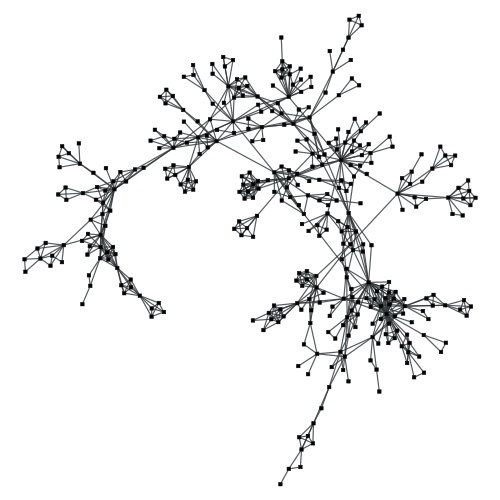

In [27]:
g = gt.collection.data["netscience"]
g = gt.GraphView(g, vfilt=gt.label_largest_component(g))
g = gt.Graph(g, prune=True)
gt.graph_draw(
    g, 
    vertex_color="black", vertex_fill_color="black",
    vertex_size=5, vertex_shape="square",
    edge_pen_width=1.2, output_size=(500, 500));

## Exporting and importing graph files

Saving a graph in a file

<div class="alert alert-warning">
    
- **save**(file_name, fmt='auto'): Save graph to <code>file_name</code>. The format <code>fmt</code> can be "gt", "graphml", "xml", "dot" or "gml". 

</div>    

In [28]:
g.save("graph.graphml")

<div class="alert alert-danger">
    
If you want to preserve internal properties of the graph, you must use either "gt" or "graphml".

</div>    

Loading a graph file

<div class="alert alert-warning">
    
- **load_graph**(file_name, fmt='auto', ignore_vp=None, ignore_ep=None, ignore_gp=None): Load a graph from  <code>file_name</code>. The format <code>fmt</code> can be "gt", "graphml", "xml", "dot" or "gml". 

</div>

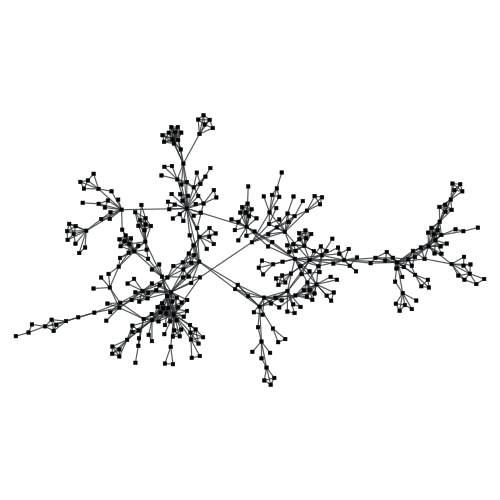

In [29]:
g1 = gt.load_graph("graph.graphml")
gt.graph_draw(
    g1, 
    vertex_color="black", vertex_fill_color="black",
    vertex_size=5, vertex_shape="square",
    edge_pen_width=1.2, output_size=(500, 500));

Loading a graph file

<div class="alert alert-warning">
    
- **load_graph_from_csv**(file_name, directed=False, eprop_types=None, eprop_names=None, string_vals=True, hashed=False, skip_first=False, ecols=(0, 1), csv_options={'delimiter': ', ', 'quotechar': '"'}): Load a graph from  a csv <code>file_name</code> containing a list of edges and edges properties.

</div>

In [30]:
import pandas as pd
edge_list = [[1, 2],
             [2, 3],
             [3, 1],
             [4, 5],
             [5, 6],
             [6, 4],
             [1, 6]
            ]
edge_list_df = pd.DataFrame(edge_list, columns=['i', 'j'])
edge_list_df['weight'] = np.random.random(len(edge_list))*5
edge_list_df.to_csv("example_edge_list.csv", index=None)
edge_list_df

,i,j,weight
0,1,2,3.356535
1,2,3,4.758140
2,3,1,3.939791
3,4,5,3.895642
4,5,6,2.325300
5,6,4,4.479444
6,1,6,0.177391


In [31]:
g = gt.load_graph_from_csv("example_edge_list.csv", directed=False, skip_first=1)

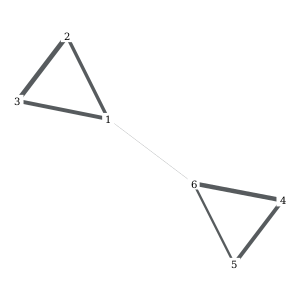

In [32]:
gt.graph_draw(
    g, 
    vertex_text=g.vertex_properties['name'], vertex_font_size=10, 
    vertex_color="white", vertex_fill_color="white",
    vertex_size=15, vertex_shape="square", 
    edge_pen_width=g.edge_properties['c0'],
    output_size=(300, 300));